# Homework 8
## Adam Sanchez 
### MATH 4650

______________________________________________________________________________________________________________________

### 1)

Lets note that for this problem we will have 3 diffrent IVPs (one for each raptor) where the initial value is the starting location of the raptor. In the code bellow I solve the problem: 

In [2]:
import numpy as np 
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd

In [32]:
c = [np.cos(np.deg2rad(56)), np.sin(np.deg2rad(56))]
c_norm = np.linalg.norm(c)
h_zero = [0,0]
h = lambda t: 6*t*(c/c_norm)+h_zero
tspan = [0,1]

Raptor 1 eats the human at t =  0.612876086667649


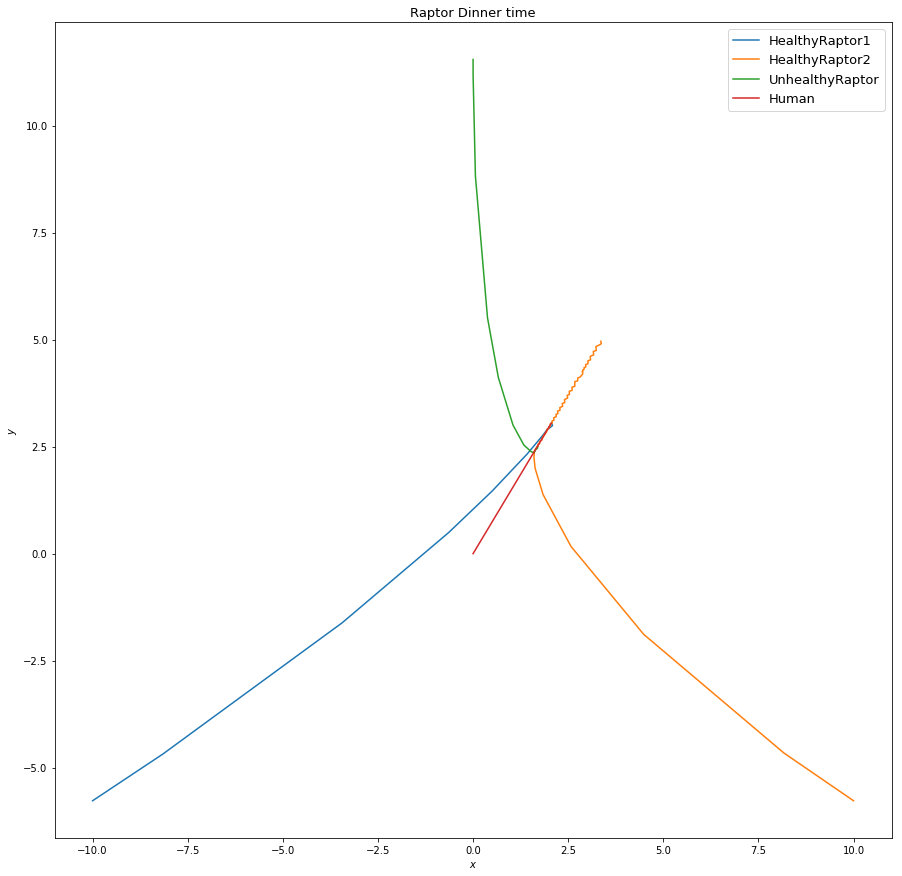

In [35]:
#Healthy Raptor 1 (Bottom Left)
drdt1 = lambda t,r: 25*((h(t)-r)/np.linalg.norm(h(t)-r)) #first dr/dt 

r_init1 = [-10,-(np.sqrt(3)/6)*20]; #starting location of the first raptor
def dist(t,r): #creating the stopping event
    return np.linalg.norm(h(t) - r) - 0.01

dist.terminal = True

sol1 = solve_ivp(drdt1,tspan,r_init1,events=dist)

#Healthy Raptor 2 (Bottom Right)
drdt2 = lambda t,r: 25*((h(t)-r)/np.linalg.norm(h(t)-r)) #second dr/dt
r_init2 = [10, -(np.sqrt(3)/6)*20]; #starting position for the second healthy raptor

sol2 = solve_ivp(drdt2,tspan,r_init2, events=dist)

#Unhealthy raptor (top)
drdt3 = lambda t,r: 20*((h(t)-r)/np.linalg.norm(h(t)-r)) #dr/dt for injured raptor
r_init3 = [0,(np.sqrt(3)/3)*20]; #starting position for the injured raptor
sol3 = solve_ivp(drdt3,tspan,r_init3, events=dist)

if max(sol1.t) < max(sol2.t) and max(sol3.t):
    print("Raptor 1 eats the human at t = ", max(sol1.t))
elif max(sol2.t) < max(sol1.t) and max(sol3.t):
    print("Raptor 2 eats the human at t = ", max(sol2.t))
else:
    print("Raptor 3 eats the human at t = ", max(sol3.t))

#Finding the Humans path  
human = []
for i in range(0,len(sol1.t)):
     human.append(h(sol1.t[i]))
human_loc = np.array(human)

plt.figure(figsize = (15,15))
plt.plot(sol1.y[0,:],sol1.y[1,:],sol2.y[0,:],sol2.y[1,:],sol3.y[0,:],sol3.y[1,:], human_loc[:,0],human_loc[:,1])
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.title("Raptor Dinner time", fontsize = 13);
plt.legend(['HealthyRaptor1', 'HealthyRaptor2', 'UnhealthyRaptor', 'Human'], fontsize = 13)


From this graph and the output we can see that the first healthy raptor in the bottom left gets to the human first at about 0.62 seconds.

______________________________________________________________________________________________________________________

### 2)



###### a)

Because we have an IVP we know that if there is a soltion in $[1,1\frac{2}{3}]$ then it is unique. In order to prove that it exists we need to see if the derivative is Lipschitz in y: 

$$\left|\frac{1+t}{1+y_1}-\frac{1+t}{1+y_2}\right| = \left|\frac{(1+t)(1+y_2)-(1+t)(1+y_1)}{(1+y_1)+(1+y_2)}\right| = \left|\frac{1+t+y_2+ty_2-1-t-y_1-ty_1}{(1+y_1)+(1+y_2)}\right| = \left|\frac{y_2+ty_2-y_1-ty_1}{(1+y_1)+(1+y_2)}\right| = \left|\frac{y_2(1+t)-y_1(1+t)}{(1+y_1)+(1+y_2)}\right| = \left|\frac{(t+1)(y_2-y_1)}{(1+y_1)+(1+y_2)}\right| = \left|-\frac{(t+1)(y_1-y_2)}{(1+y_1)+(1+y_2)}\right| = \left|\frac{(t+1)(y_1-y_2)}{(1+y_1)+(1+y_2)}\right|$$

So we can clearly see that $\left|\frac{(t+1)(y_1-y_2)}{(1+y_1)+(1+y_2)}\right| \leq L|y_1-y_2|$ for all $y$ where $L = (1+t)$. Thus we know the derivative is Lipschitz. So there will we a solution, and it will be unique. 

###### b)

$\frac{dy}{dt} = \frac{1+t}{1+y} \implies (1+y)dy = (1+t)dt \implies \frac{y^2}{2}+y = \frac{t^2}{2}+t + C \implies y(t) = \sqrt{t^2+2t+C}-1$

Now imposing the IV: 

$2=\sqrt{1+2+C}-1 \implies 3=\sqrt{3+C} \implies C=6$

So our solution is: 

$y(t) = \sqrt{t^2+2t+6}-1$

###### c)  

As we can see from the code below our estimate for y(2) is 2.708333

In [4]:
def forward_Euler( f, y0, tspan, h=0.1):
    a = tspan[0] 
    b = tspan[1]  
    # Initialize
    t    = a
    w    = y0
    # Update history
    tHist = [t]
    wHist = [w]  # w[i] approximates y( t[i] )
    dydtHist = []
    # Loop
    while t < b :
        tNext = min(t+h,b)  # don't go too far
        hh    = tNext - t   # hh is just h except perhaps at the last time step
        dydt  = f(t,w)
        w    += hh*dydt     # this is the heart of forward Euler
        t     = tNext
        # Update history
        tHist.append(t)
        wHist.append(w)
        dydtHist.append(dydt)

    dydtHist.append( f(t,w) )# lagged


    return np.array(tHist), np.array(wHist)

In [240]:
f = lambda t,y: (1+t)/(1+y)
y_initial = 2
tspan = [1.0,2.0]


tHist, wHist = forward_Euler( f, y_initial, tspan, h=.5)

data = {'t': tHist, 'y(t)': wHist}
df = pd.DataFrame(data=data)

df

,t,y(t)
0,1.0,2.000000
1,1.5,2.333333
2,2.0,2.708333


###### d)

Note that $y''(t) = \frac{t+1}{\sqrt{t^2+2t+6}}$ and $\left|\frac{t+1}{\sqrt{t^2+2t+6}}\right| \leq M$ where $M = t+1$ for $t \in [1,2]$

So $|y(t_i)-w_i| \leq .5(e^{(t_i+1)(t_i-1)}-1)$

In [251]:
y_true = lambda t: np.sqrt(t**2+2*t+6)-1


errbound = []
for i in range(0,len(wHist)):
    errbound.append(.5*np.exp((tHist[i]+1)*(tHist[i]-1))-1)


trueerror = abs(y_true(2)-wHist[2])
print('The error bound is ', errbound[2], 'The true error is ', trueerror)

The error bound is  9.042768461593834 The true error is  0.03332405344060785


So our error bound is greater than the actual error but it isnt very good. So I think there may be something wrong with my formula. 

###### e)

In [22]:
f = lambda t,y: (1+t)/(1+y)
y_initial = 2
y_true = lambda t: np.sqrt(t**2+2*t+6)-1
tspan = [1.0,1+10**(-5)]

hList = np.linspace(10**(-4),10**(-14),3)
err = []
 
tHist, wHist = forward_Euler( f, y_initial, tspan, h=hList[0])
a = wHist[-1]
err.append(abs(y_true(1+10**(-5))-a))




In [23]:
tHist, wHist = forward_Euler( f, y_initial, tspan, h=hList[1])
a = wHist[-1]
err.append(abs(y_true(1+10**(-5))-a))


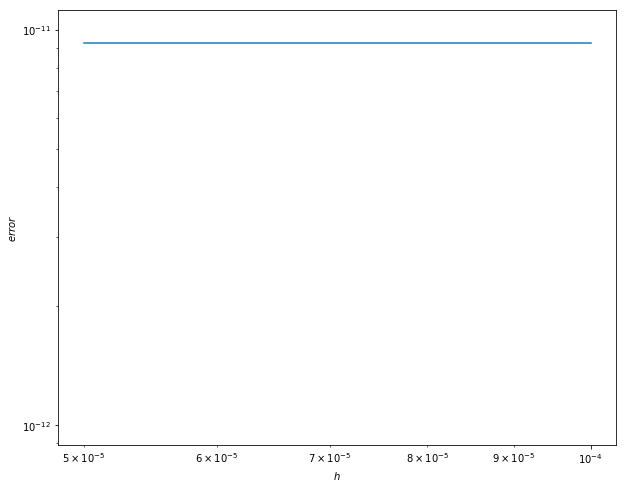

In [28]:
plt.figure(figsize=(10,8)) 
plt.loglog(hList[0:2], err)
plt.xlabel("$h$"); plt.ylabel("$error$");

So I get a constant error (I only ran it for a couple of h's becuase my computer couldnt handle much more). This is kind of surprising becuase we would expect that the error increases as the step size increases. What I think is happening is that we are hitting the machine accuracy so the error just cant get any smaller. 

###### f)

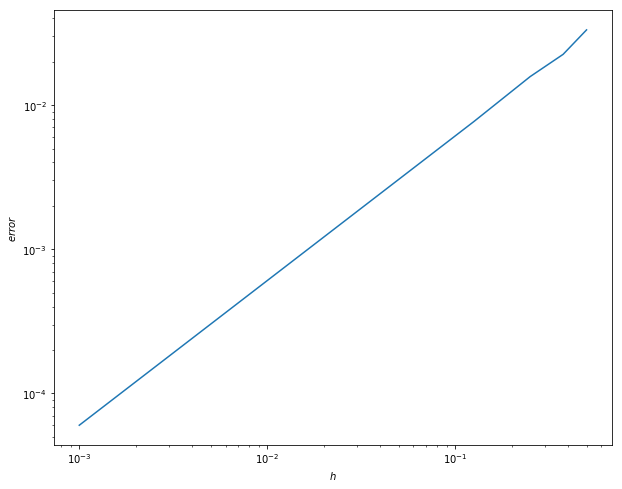

In [29]:
f = lambda t,y: (1+t)/(1+y)
y_initial = 2
y_true = lambda t: np.sqrt(t**2+2*t+6)-1
tspan = [1.0,2.0]

hList = np.linspace(0.001,.5,5)
err = []

for i in hList: 
    tHist, wHist = forward_Euler( f, y_initial, tspan, h=i)
    a = wHist[-1]
    err.append(abs(y_true(2)-a))
    #err.append(a)

plt.figure(figsize=(10,8)) 
plt.loglog(hList, err)
plt.xlabel("$h$"); plt.ylabel("$error$");

So it looks like the smallest value of h minimizes the error. This is what we would expect, as opposed to the part e which we didnt expect. 